In [1]:
# 1. Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc)

In [2]:
# 2. Loading the dataset

data = pd.read_csv(r'C:\Users\Welcome\Desktop\Python Coding Projects\Credit Analysis - Probability of Defaulting\data\cr_loan2.csv')

df = data

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
# 3. Treating missing values. To be safe, I will be using Linear Regression to fill the null values

from sklearn.linear_model import LinearRegression

train_emp_length = df[df['person_emp_length'].notnull()]
test_emp_length = df[df['person_emp_length'].isnull()]
train_loan_int_rate = df[df['loan_int_rate'].notnull()]
test_loan_int_rate = df[df['loan_int_rate'].isnull()]

features = ['person_age','person_income','loan_amnt','loan_percent_income']

lr = LinearRegression()

lr.fit(train_emp_length[features], train_emp_length['person_emp_length'])
lr.fit(train_loan_int_rate[features], train_loan_int_rate['loan_int_rate'])

df.loc[df['person_emp_length'].isnull(),'person_emp_length'] = lr.predict(test_emp_length[features])
df.loc[df['loan_int_rate'].isnull(),'loan_int_rate'] = lr.predict(test_loan_int_rate[features])

In [6]:
# Defining Features and target variable

numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)



In [7]:
target = ['loan_status']
numerical_cols = [col for col in numerical_cols if col != 'loan_status']

print('target: ', target)
print('numerical columns:\n', numerical_cols)
print('categorical_cols', categorical_cols)


target:  ['loan_status']
numerical columns:
 ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_cols ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [8]:
# 4. Outlier Treatment

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [9]:
# 5. Numerical cols standardisation

Scaler = StandardScaler()
df[numerical_cols] = Scaler.fit_transform(df[numerical_cols])

In [10]:
# 6. Encoding categorical cols

df = pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [11]:
# 7. Train Test Split

X = df.drop(columns=['loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Stratify keeps the target class distribution balanced

In [24]:
# 8. Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
# 9. Evaluation

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test,y_proba))

[[4851  244]
 [ 613  809]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.57      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.79      6517
weighted avg       0.86      0.87      0.86      6517

ROC AUC Score:  0.8711339679700322


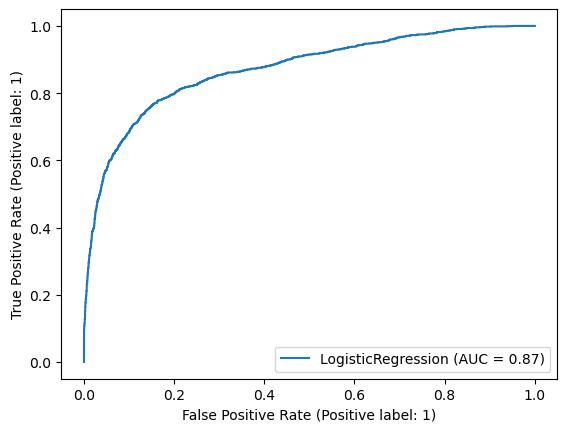

In [14]:
# 10a. Visualising Confusion matrix and ROC curve

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.show()

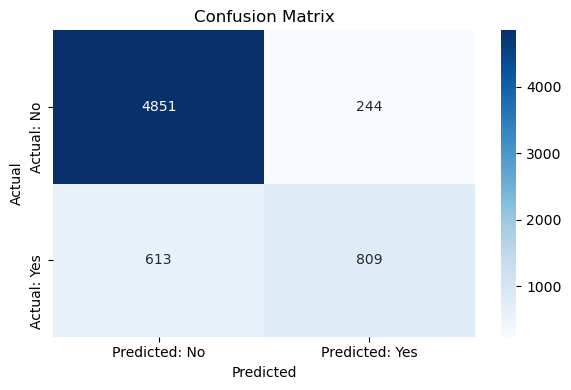

In [15]:
# 10b. Visualising Confusion Matrix

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar='False',
           xticklabels=['Predicted: No','Predicted: Yes'],
           yticklabels=['Actual: No','Actual: Yes'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [16]:
# 11. Interpreting Coefficients

feature_names = X.columns
coefs = logreg.coef_[0]

for name, coef in zip(feature_names, coefs):
    print(f'{name}: {coef:.4f}')

person_age: -0.0184
person_income: 0.0469
person_emp_length: -0.0157
loan_amnt: -0.7168
loan_int_rate: 0.2181
loan_percent_income: 1.4600
cb_person_cred_hist_length: -0.0067
person_home_ownership_OTHER: 0.4692
person_home_ownership_OWN: -1.6245
person_home_ownership_RENT: 0.8413
loan_intent_EDUCATION: -0.7963
loan_intent_HOMEIMPROVEMENT: 0.1207
loan_intent_MEDICAL: -0.1389
loan_intent_PERSONAL: -0.5771
loan_intent_VENTURE: -1.0686
loan_grade_B: 0.1953
loan_grade_C: 0.3123
loan_grade_D: 2.4408
loan_grade_E: 2.6098
loan_grade_F: 3.0054
loan_grade_G: 4.4593
cb_person_default_on_file_Y: 0.0625


In [17]:
# 12. Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=100)

param_grid = {
    'C' : [0.01,0.1,1,10], #Inverse of regularisation strength (smaller -> stronger regularisation)
    'penalty' : ['l1','l2'], #type of regularisation l1: lasso, l2: Ridge
    'solver' : ['liblinear'] #optimization algorithm 
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_logreg = grid_search.best_estimator_
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [18]:
# 13. Checking if there is Class imbalance

pct_loan_approved = df[df['loan_status'] == 1]['loan_status'].count()*100.0/df['loan_status'].count()

print(pct_loan_approved)

21.81639605905282


There is mild imbalance and since False Negatives here dont hurt us much, we can look at metrics like recall and F1-score here.

In [19]:
print("Recall: ", recall_score(y_test,best_logreg.predict(X_test)))
print("F1-Score: ", f1_score(y_test,best_logreg.predict(X_test)))

Recall:  0.5689170182841069
F1-Score:  0.6526825332795482


There's a room for improvement

In [20]:
# 14a. Handling Class Imbalance using class_weight = 'balanced'

logreg_bal = LogisticRegression(class_weight = 'balanced', max_iter=1000)
logreg_bal.fit(X_train, y_train)
y_pred_bal = logreg_bal.predict(X_test)

print("Balanced model performance:")
print(classification_report(y_test, y_pred_bal))

print("Recall_bal:", recall_score(y_test, y_pred_bal))
print("F1-Score_bal:", f1_score(y_test, y_pred_bal))

Balanced model performance:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5095
           1       0.55      0.78      0.65      1422

    accuracy                           0.81      6517
   macro avg       0.74      0.80      0.76      6517
weighted avg       0.85      0.81      0.82      6517

Recall_bal: 0.7834036568213784
F1-Score_bal: 0.6482397439627583


In [21]:
# 14b. Handling Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = logreg_smote.predict(X_test)

print("SMOTE model performance:")
print(classification_report(y_test, y_pred_smote))

print("Recall_SMOTE:", recall_score(y_test, y_pred_smote))
print("F1-Score_SMOTE:", f1_score(y_test, y_pred_smote))

SMOTE model performance:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5095
           1       0.55      0.77      0.64      1422

    accuracy                           0.81      6517
   macro avg       0.74      0.80      0.76      6517
weighted avg       0.85      0.81      0.82      6517

Recall_SMOTE: 0.7749648382559775
F1-Score_SMOTE: 0.6438796377446684


We notice that class_weight = 'balanced' method gives us slightly better recall and F1-score

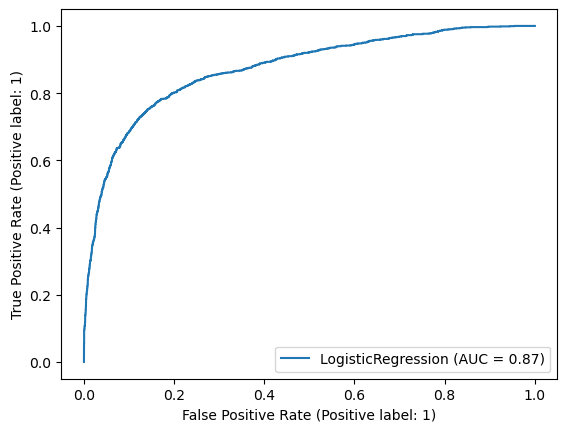

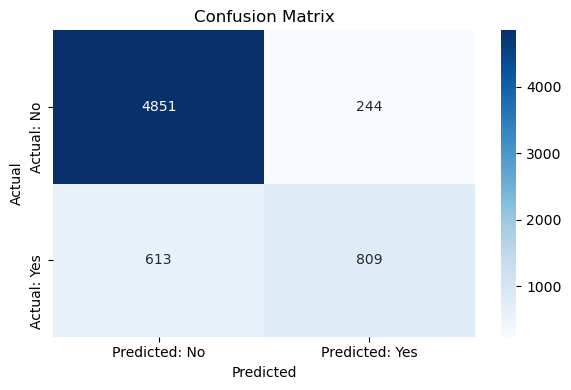

In [22]:
# 15. Plotting ROC Curve and Confusion Matrix for logreg_bal

RocCurveDisplay.from_estimator(logreg_bal, X_test, y_test)
plt.show()

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar='False',
           xticklabels=['Predicted: No','Predicted: Yes'],
           yticklabels=['Actual: No','Actual: Yes'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

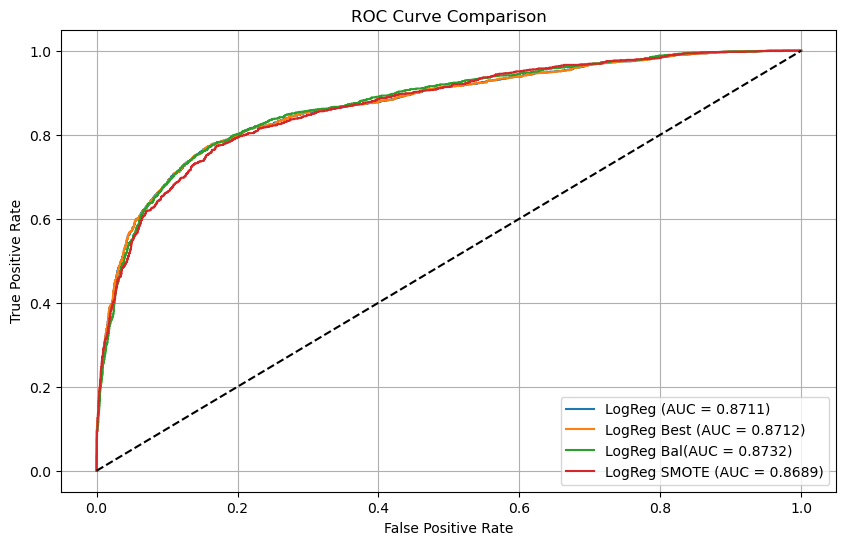

In [25]:
# 16. Comparing ROC curves

# Getting predicted probabilities
y_prob_logreg = logreg.predict_proba(X_test)[:,1]
y_prob_logreg_best = best_logreg.predict_proba(X_test)[:,1]
y_prob_logreg_bal = logreg_bal.predict_proba(X_test)[:,1]
y_prob_logreg_smote = logreg_smote.predict_proba(X_test)[:,1]

# Computing ROC curves and AUCs
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_logreg_best, tpr_logreg_best, _ = roc_curve(y_test, y_prob_logreg_best)
fpr_logreg_bal, tpr_logreg_bal, _ = roc_curve(y_test, y_prob_logreg_bal)
fpr_logreg_smote, tpr_logreg_smote, _ = roc_curve(y_test, y_prob_logreg_smote)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_logreg_best = auc(fpr_logreg_best, tpr_logreg_best)
auc_logreg_bal = auc(fpr_logreg_bal, tpr_logreg_bal)
auc_logreg_smote = auc(fpr_logreg_smote, tpr_logreg_smote)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {auc_logreg:.4f})')
plt.plot(fpr_logreg_best, tpr_logreg_best, label=f'LogReg Best (AUC = {auc_logreg_best:.4f})')
plt.plot(fpr_logreg_bal, tpr_logreg_bal, label=f'LogReg Bal(AUC = {auc_logreg_bal:.4f})')
plt.plot(fpr_logreg_smote, tpr_logreg_smote, label=f'LogReg SMOTE (AUC = {auc_logreg_smote:.4f})')

# Diagonal line for random guess
plt.plot([0,1],[0,1],'k--')

# Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

LogReg_bal has the best AUC